In [1]:
import pandas as pd
import numpy as np
import seaborn as  sns
import matplotlib.pyplot as plt
import math 
from scipy import stats
import warnings

warnings.simplefilter(action='ignore', category=UserWarning)

In [2]:
df = pd.read_excel("Labor_safety.xlsx")
df

date   Employee_position  Financial_loss currency  \
0  2021-04-01           ·Éõ·Éë·É†·Éò·Éñ·Éí·Éê·Éï·Éò           30000      GEL   
1  2021-09-01     ·Éê·Éõ·É¨·Éî·É° ·Éù·Éû·Éî·É†·Éê·É¢·Éù·É†·Éò            1000      GEL   
2  2021-12-16  ·É°·Éò·Éõ·Éê·É¶·Éö·Éî·Éñ·Éî ·Éõ·Éù·Éõ·É£·É®·Éê·Éï·Éî          150000      GEL   
3  2022-02-01          ·Éõ·Éî·Éê·É†·Éõ·Éê·É¢·É£·É†·Éî               0      GEL   
4  2022-03-01            ·Éõ·É•·É°·Éù·Éï·Éî·Éö·Éò             500      GEL   
5  2022-04-01            ·Éõ·É•·É°·Éù·Éï·Éî·Éö·Éò               0      GEL   
6  2022-04-01        truck driver            1000      GEL   
7  2022-04-01            ·Éõ·É•·É°·Éù·Éï·Éî·Éö·Éò             200      GEL   
8  2022-05-01        truck driver           35000      USD   
9  2022-05-01           ·Éõ·Éë·É†·Éò·Éñ·Éí·Éê·Éï·Éò             300      GEL   
10 2022-06-01                ·Éõ·É£·É®·Éê             500      GEL   
11 2022-07-01                ·Éõ·É£·É®·Éê            2000      GEL   
12 2022-08-01                ·Éõ·É£·É®·Éê               0      GEL   
13 2022-12-01        truck driver           12000      GEL   
14 2023-04-01                ·Éõ·É£·É®·Éê             250      GEL   
15 2023-05-01            ·Éõ·É•·É°·Éù·Éï·Éî·Éö·Éò               0      GEL   
16 2023-05-01           ·Éõ·Éë·É†·Éò·Éñ·Éí·Éê·Éï·Éò              50      GEL   
17 2023-06-14         ·É®·Éî·Éõ·Éì·É£·É¶·Éî·Éë·Éî·Éö·Éò             200      GEL   

    Financial_loss_In_Gel Area_of_risk Area_of_risk_2  impact_score  \
0                   30000        helth         safety             4   
1                    1000       social         safety             5   
2                  150000        helth         safety             5   
3                       0        helth         safety             3   
4                     500       social    envoiroment             2   
5                       0        helth         safety             1   
6                    1000       safety         safety             1   
7                     200       safety          helth             2   
8                   91000       safety   envoironment             1   
9                     300        helth         safety             2   
10                    500        helth         safety             4   
11                   2000        helth         safety             4   
12                      0       safety          helth             2   
13                  12000       safety         safety             1   
14                    250       safety          helth             2   
15                      0       safety          helth             1   
16                     50       safety          helth             2   
17                    200        helth         safety             2   

          severity_impact  probability_score         probability  risk_score  \
0                   ·Éõ·É´·Éò·Éõ·Éî                  2  ·Éú·Éê·Éô·Éö·Éî·Éë·Éê·Éì ·É°·Éê·Éï·Éê·É†·Éê·É£·Éì·Éù           8   
1                ·É§·Éê·É¢·Éê·Éö·É£·É†·Éò                  1             ·Éò·É®·Éï·Éò·Éê·Éó·Éò           5   
2                ·É§·Éê·É¢·Éê·Éö·É£·É†·Éò                  1             ·Éò·É®·Éï·Éò·Éê·Éó·Éò           5   
3          ·É°·Éê·É®·É£·Éê·Éö·Éù·É°·Éò·Éõ·É´·Éò·Éõ·Éî                  2  ·Éú·Éê·Éô·Éö·Éî·Éë·Éê·Éì ·É°·Éê·Éï·Éê·É†·Éê·É£·Éì·Éù           6   
4   ·Éú·Éê·Éô·Éö·Éî·Éë·Éê·Éì·Éõ·Éú·Éò·É®·Éï·Éú·Éî·Éö·Éù·Éï·Éê·Éú·Éò                  2  ·Éú·Éê·Éô·Éö·Éî·Éë·Éê·Éì ·É°·Éê·Éï·Éê·É†·Éê·É£·Éì·Éù           4   
5              ·É£·Éõ·Éú·Éò·É®·Éï·Éú·Éî·Éö·Éù                  2  ·Éú·Éê·Éô·Éö·Éî·Éë·Éê·Éì ·É°·Éê·Éï·Éê·É†·Éê·É£·Éì·Éù           2   
6              ·É£·Éõ·Éú·Éò·É®·Éï·Éú·Éî·Éö·Éù                  1             ·Éò·É®·Éï·Éò·Éê·Éó·Éò           1   
7   ·Éú·Éê·Éô·Éö·Éî·Éë·Éê·Éì·Éõ·Éú·Éò·É®·Éï·Éú·Éî·Éö·Éù·Éï·Éê·Éú·Éò                  2  ·Éú·Éê·Éô·Éö·Éî·Éë·Éê·Éì ·É°·Éê·Éï·Éê·É†·Éê·É£·Éì·Éù           4   
8              ·É£·Éõ·Éú·Éò·É®·Éï·Éú·Éî·Éö·Éù                  2  ·Éú·Éê·Éô·Éö·Éî·Éë·Éê·Éì ·É°·Éê·Éï

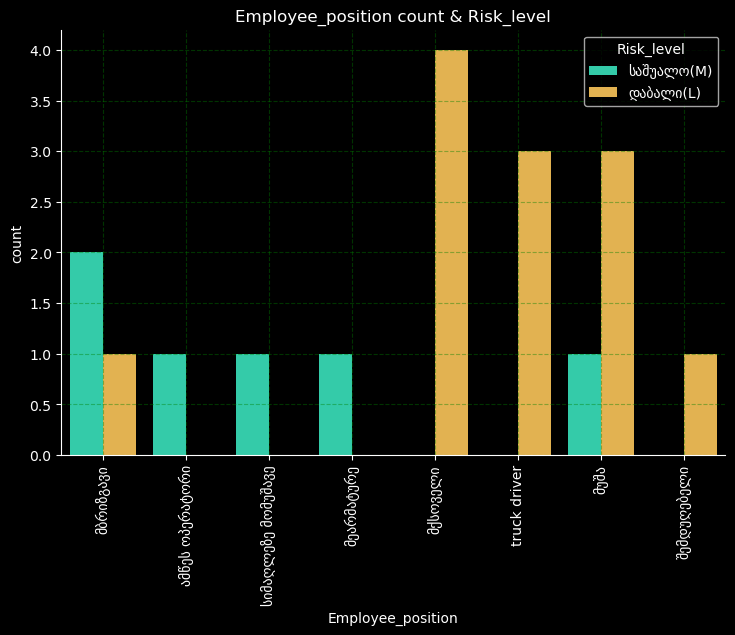

In [3]:
plt.style.use('dark_background')

sns.catplot(data = df, x = 'Employee_position',kind = 'count',hue = 'Risk_level',
            palette = 'turbo',aspect=1.5, legend_out=False)

plt.tick_params(axis='x', rotation=90)
plt.title("Employee_position count & Risk_level")
plt.grid(alpha = 0.4, color = 'g',linestyle='--')

plt.show()

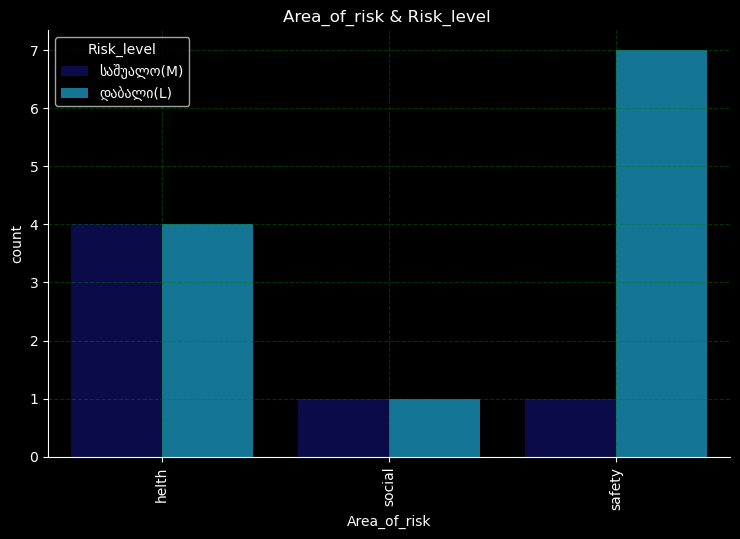

In [4]:
sns.catplot(data = df, x = 'Area_of_risk',kind = 'count',hue = 'Risk_level',
            palette = 'ocean',aspect=1.5, legend_out=False)

plt.tick_params(axis='x', rotation=90)
plt.title("Area_of_risk & Risk_level ")
plt.grid(alpha = 0.4, color = 'g',linestyle='--')

plt.show()

In [5]:
emp_rs_mean = df.groupby("Employee_position").\
    agg({'risk_score': ['count','mean']}).reset_index()


emp_rs_mean.columns =['_'.join(col).strip()for col in emp_rs_mean.columns.values]

emp_rs_mean.sort_values('risk_score_mean',ascending=False, inplace=True)

emp_rs_mean

Employee_position_  risk_score_count  risk_score_mean
2           ·Éõ·Éë·É†·Éò·Éñ·Éí·Éê·Éï·Éò                 3         6.000000
3          ·Éõ·Éî·Éê·É†·Éõ·Éê·É¢·É£·É†·Éî                 1         6.000000
1     ·Éê·Éõ·É¨·Éî·É° ·Éù·Éû·Éî·É†·Éê·É¢·Éù·É†·Éò                 1         5.000000
6  ·É°·Éò·Éõ·Éê·É¶·Éö·Éî·Éñ·Éî ·Éõ·Éù·Éõ·É£·É®·Éê·Éï·Éî                 1         5.000000
4                ·Éõ·É£·É®·Éê                 4         4.000000
5            ·Éõ·É•·É°·Éù·Éï·Éî·Éö·Éò                 4         3.000000
7         ·É®·Éî·Éõ·Éì·É£·É¶·Éî·Éë·Éî·Éö·Éò                 1         2.000000
0        truck driver                 3         1.333333

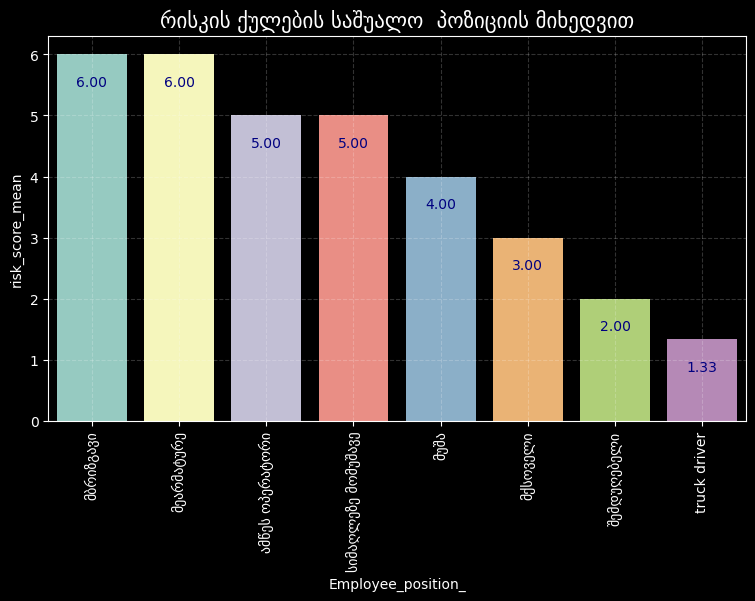

In [6]:
plt.figure(figsize=(9,5))

plots = sns.barplot(x = emp_rs_mean["Employee_position_"], y= emp_rs_mean["risk_score_mean"])

for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                   bar.get_height()), ha='center', va='center',
                   size= 10, xytext=(0, -20),color = "navy",
                   textcoords='offset points')
    
plt.grid(alpha = 0.2, linestyle='--')

plt.tick_params(axis='x', rotation=90)
plt.title("·É†·Éò·É°·Éô·Éò·É° ·É•·É£·Éö·Éî·Éë·Éò·É° ·É°·Éê·É®·É£·Éê·Éö·Éù  ·Éû·Éù·Éñ·Éò·É™·Éò·Éò·É° ·Éõ·Éò·ÉÆ·Éî·Éì·Éï·Éò·Éó",size = 15)

plt.show()

In [7]:
area_rs_mean = df.groupby("Area_of_risk").\
    agg({'risk_score': ['count','mean']}).reset_index()


area_rs_mean.columns =['_'.join(col).strip()for col in area_rs_mean.columns.values]

area_rs_mean.sort_values('risk_score_mean',ascending=False, inplace=True)

area_rs_mean

Area_of_risk_  risk_score_count  risk_score_mean
0         helth                 8            4.875
2        social                 2            4.500
1        safety                 8            2.500

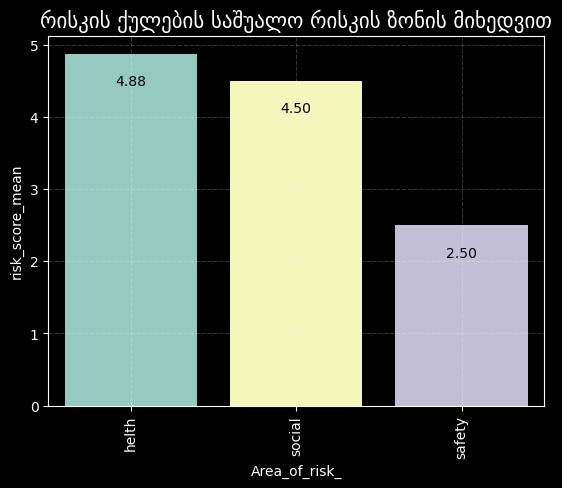

In [8]:
plots = sns.barplot(x = area_rs_mean["Area_of_risk_"], y= area_rs_mean["risk_score_mean"])

for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                   bar.get_height()), ha='center', va='center',
                   size= 10, xytext=(0, -20),color = "black",
                   textcoords='offset points')
    
plt.grid(alpha = 0.2, linestyle='--')

plt.tick_params(axis='x', rotation=90)
plt.title("·É†·Éò·É°·Éô·Éò·É° ·É•·É£·Éö·Éî·Éë·Éò·É° ·É°·Éê·É®·É£·Éê·Éö·Éù ·É†·Éò·É°·Éô·Éò·É° ·Éñ·Éù·Éú·Éò·É° ·Éõ·Éò·ÉÆ·Éî·Éì·Éï·Éò·Éó",size = 15)

plt.show()

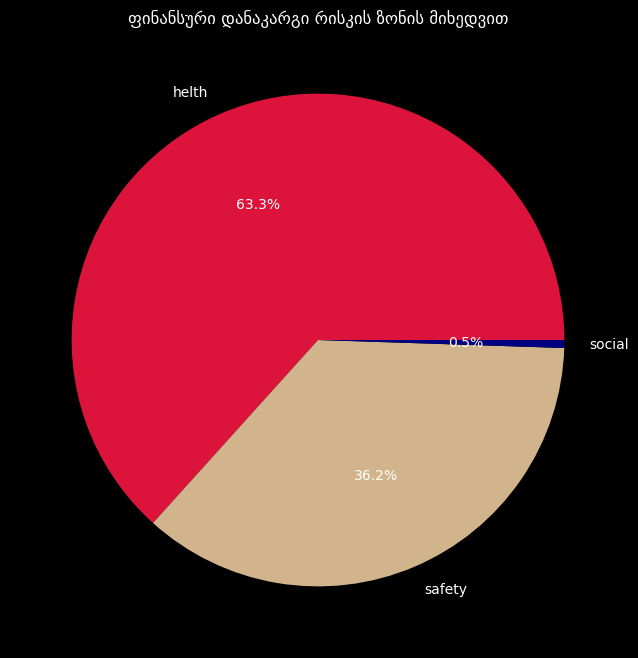

In [9]:
plt.figure(figsize=(8,8))

color = ["crimson",'tan','navy','darkorange','limegreen','teal','orchid',
        'r','gold','b','crimson','slategrey','tan','pink','y']


df.groupby('Area_of_risk')['Financial_loss_In_Gel'].sum().\
    sort_values(ascending=False).plot(kind='pie',autopct='%1.1f%%',colors = color)
                                                                     

plt.title("·É§·Éò·Éú·Éê·Éú·É°·É£·É†·Éò ·Éì·Éê·Éú·Éê·Éô·Éê·É†·Éí·Éò ·É†·Éò·É°·Éô·Éò·É° ·Éñ·Éù·Éú·Éò·É° ·Éõ·Éò·ÉÆ·Éî·Éì·Éï·Éò·Éó")
plt.ylabel(None)
plt.show()

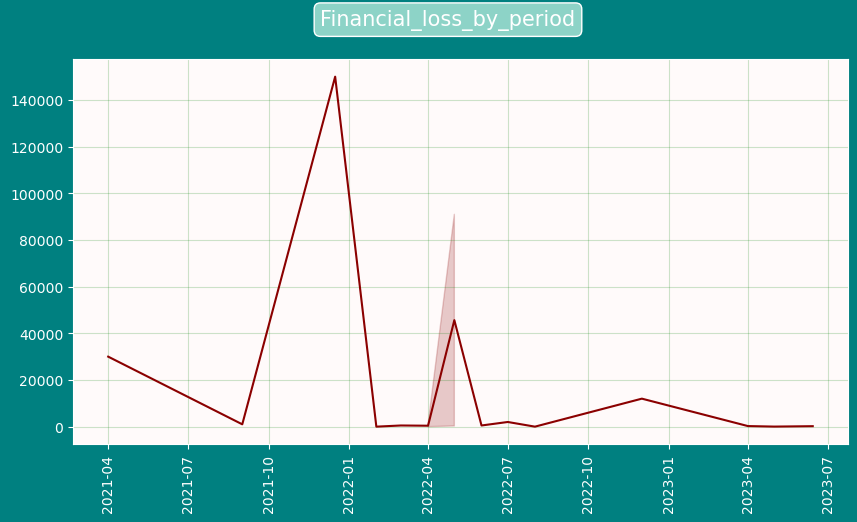

In [10]:
fig = plt.figure(figsize = (10,5))
fig.set(facecolor = "teal")

sns.lineplot(x = df.date , y = df.Financial_loss_In_Gel,color = "darkred").set(facecolor = "snow")

plt.grid(color = "g", linestyle = "-",alpha = 0.2)

fig.suptitle("Financial_loss_by_period",fontsize = 15, bbox  = {"boxstyle": "round"})
plt.xlabel(None)
plt.ylabel(None)
plt.tick_params(axis='x', rotation=90)  

plt.show()

In [11]:
t =df.pivot_table(index='Area_of_risk',columns='Risk_level',values ='risk_score',
              aggfunc=['mean'])

t

mean           
Risk_level   ·Éì·Éê·Éë·Éê·Éö·Éò(L) ·É°·Éê·É®·É£·Éê·Éö·Éù(M)
Area_of_risk                     
helth              3.0       6.75
safety             2.0       6.00
social             4.0       5.00

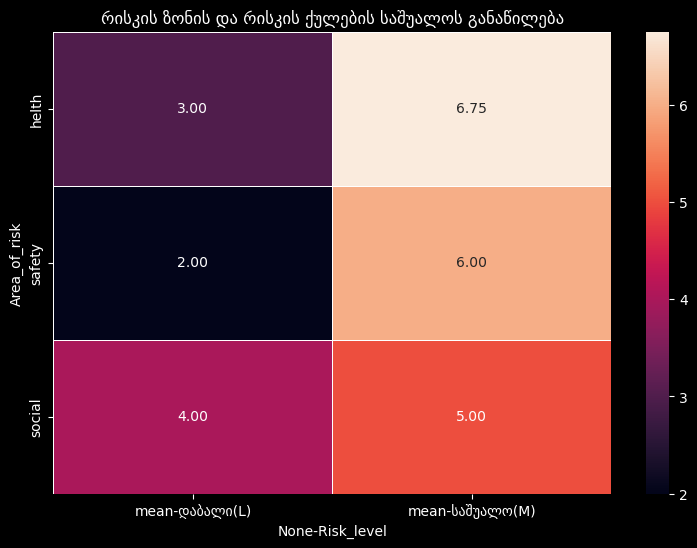

In [12]:
plt.subplots(figsize=(9,6))

sns.heatmap(t,annot = True , linewidths=0.7, fmt = '.2f')

plt.title("·É†·Éò·É°·Éô·Éò·É° ·Éñ·Éù·Éú·Éò·É° ·Éì·Éê ·É†·Éò·É°·Éô·Éò·É° ·É•·É£·Éö·Éî·Éë·Éò·É° ·É°·Éê·É®·É£·Éê·Éö·Éù·É° ·Éí·Éê·Éú·Éê·É¨·Éò·Éö·Éî·Éë·Éê")

plt.show()

In [13]:
import phik
from phik.report import plot_correlation_matrix
from phik import report

In [14]:
phik_overview = df.phik_matrix().copy()

interval columns not set, guessing: ['Financial_loss', 'Financial_loss_In_Gel', 'impact_score', 'probability_score', 'risk_score']


In [15]:
phik_overview

date  Employee_position  Financial_loss  currency  \
date                   1.000000           0.900135        0.801251       0.0   
Employee_position      0.900135           1.000000        0.806383       0.0   
Financial_loss         0.801251           0.806383        1.000000       1.0   
currency               0.000000           0.000000        1.000000       1.0   
Financial_loss_In_Gel  0.801251           0.806383        1.000000       1.0   
Area_of_risk           0.828249           0.550432        0.000000       0.0   
Area_of_risk_2         0.539893           0.000000        0.831093       1.0   
impact_score           0.875422           0.846336        0.379053       0.0   
severity_impact        0.875422           0.846336        0.379053       0.0   
probability_score      0.000000           0.478608        0.000000       0.0   
probability            0.000000           0.478608        0.000000       0.0   
risk_score             0.673712           0.671032        0.458647       0.0   
Risk_level             0.890375           0.828495        0.509938       0.0   
coment                 1.000000           1.000000        1.000000       1.0   

                       Financial_loss_In_Gel  Area_of_risk  Area_of_risk_2  \
date                                0.801251      0.828249        0.539893   
Employee_position                   0.806383      0.550432        0.000000   
Financial_loss                      1.000000      0.000000        0.831093   
currency                            1.000000      0.000000        1.000000   
Financial_loss_In_Gel               1.000000      0.000000        0.831093   
Area_of_risk                        0.000000      1.000000        0.641244   
Area_of_risk_2                      0.831093      0.641244        1.000000   
impact_score                        0.379053      0.446219        0.000000   
severity_impact                     0.379053      0.446219        0.000000   
probability_score                   0.000000      0.000000        0.000000   
probability                         0.000000      0.000000        0.000000   
risk_score                          0.458647      0.495414        0.000000   
Risk_level                          0.509938      0.136446        0.000000   
coment                              1.000000      1.000000        1.000000   

                       impact_score  severity_impact  probability_score  \
date                       0.875422         0.875422           0.000000   
Employee_position          0.846336         0.846336           0.478608   
Financial_loss             0.379053         0.379053           0.000000   
currency                   0.000000         0.000000           0.000000   
Financial_loss_In_Gel      0.379053         0.379053           0.000000   
Area_of_risk               0.446219         0.446219           0.000000   
Area_of_risk_2             0.000000         0.000000           0.000000   
impact_score               1.000000         1.000000           0.000000   
severity_impact            1.000000         1.000000           0.000000   
probability_score          0.000000         0.000000           1.000000   
probability                0.000000         0.000000           1.000000   
risk_score                 0.813869         0.813869           0.813919   
Risk_level                 0.591933         0.591933           0.075392   
coment                     1.000000         1.000000           1.000000   

                       probability  risk_score  Risk_level  coment  
date                      0.000000    0.673712    0.890375     1.0  
Employee_position         0.478608    0.671032    0.828495     1.0  
Financial_loss            0.000000    0.458647    0.509938     1.0  
currency                  0.000000    0.000000    0.000000     1.0  
Financial_loss_In_Gel     0.000000    0.458647    0.509938     1.0  
Area_of_risk              0.000000    0.495414    0.136446     1.0  
Area_of_risk_2            0.000000    0.000000

ùëÉ‚Ñéùëñ_ùêæ  ·Éê·É†·Éò·É° ·Éê·ÉÆ·Éê·Éö·Éò ·Éì·Éê ·Éû·É†·Éê·É•·É¢·Éò·Éô·É£·Éö·Éò ·Éô·Éù·É†·Éî·Éö·Éê·É™·Éò·Éò·É° ·Éô·Éù·Éî·É§·Éò·É™·Éò·Éî·Éú·É¢·Éò, ·É†·Éù·Éõ·Éö·Éò·É° ·Éô·Éù·Éõ·Éë·Éò·Éú·Éò·É†·Éî·Éë·É£·Éö·Éò ·Éõ·Éê·ÉÆ·Éê·É°·Éò·Éê·Éó·Éî·Éë·Éö·Éî·Éë·Éò ·É•·Éõ·Éú·Éò·É° ·É£·Éû·Éò·É†·Éê·É¢·Éî·É°·Éù·Éë·Éê·É° ·Éê·É†·É°·Éî·Éë·É£·Éö ·Éû·Éò·É†·É°·Éù·Éú·Éò·É° ·Éô·Éö·Éê·É°·Éò·Éô·É£·É† ·Éô·Éù·Éî·É§·Éò·É™·Éò·Éî·Éú·É¢·Éó·Éê·Éú ·É®·Éî·Éì·Éê·É†·Éî·Éë·Éò·Éó, ·É†·Éù·Éõ·Éî·Éö·Éò·É™ ·É°·Éê·É°·Éê·É†·Éí·Éî·Éë·Éö·Éù·Éê ·Éõ·ÉÆ·Éù·Éö·Éù·Éì ·É†·Éê·Éù·Éì·Éî·Éú·Éù·Éë·É†·Éò·Éï·Éò ·É¢·Éò·Éû·Éò·É° ·É™·Éï·Éö·Éê·Éì·Éî·Éë·Éò·É°·Éê ·Éì·Éê ·É™·Éï·Éö·Éê·Éì·Éî·Éë·É° ·É®·Éù·É†·Éò·É° ·É¨·É†·É§·Éò·Éï·Éò ·Éì·Éê·Éõ·Éù·Éô·Éò·Éì·Éî·Éë·É£·Éö·Éî·Éë·Éò·É° ·Éô·Éê·Éï·É®·Éò·É†·Éò·É° ·É®·Éî·Éõ·Éù·É¨·Éõ·Éî·Éë·Éò·É° ·Éì·É†·Éù·É°.
Phi_K ·Éõ·É£·É®·Éê·Éù·Éë·É° ·É†·Éù·Éí·Éù·É†·É™ ·É†·Éê·Éù·Éì·Éî·Éú·Éù·Éë·É†·Éò·Éï, ·Éê·É°·Éî·Éï·Éî ·Éô·Éê·É¢·Éî·Éí·Éù·É†·Éò·Éê·Éö·É£·É† ·Éì·Éê ·Éò·Éú·É¢·Éî·É†·Éï·Éê·Éö·É£·É† ·É™·Éï·Éö·Éê·Éì·Éî·Éë·É° ·É®·Éù·É†·Éò·É°. ·Éê·É°·Éê·ÉÆ·Éê·Éï·É° ·Éê·É†·Éê·É¨·É†·É§·Éò·Éï ·Éì·Éê·Éõ·Éù·Éô·Éò·Éì·Éî·Éë·É£·Éö·Éî·Éë·Éê·É° ·Éì·Éê ·É£·Éë·É†·É£·Éú·Éì·Éî·Éë·Éê ·Éû·Éò·É†·É°·Éù·Éú·Éò·É° ·Éô·Éù·É†·Éî·Éö·Éê·É™·Éò·Éò·É° ·Éô·Éù·Éî·É§·Éò·É™·Éò·Éî·Éú·É¢·É° ·Éë·Éò·Éï·Éê·É†·Éò·Éê·É™·Éò·É£·Éö·Éò ·Éú·Éù·É†·Éõ·Éê·Éö·É£·É†·Éò ·Éí·Éê·Éú·Éê·É¨·Éò·Éö·Éî·Éë·Éò·É° ·É®·Éî·Éõ·Éó·ÉÆ·Éï·Éî·Éï·Éê·É®·Éò.
·Éê·Éõ·Éò·É¢·Éù·Éõ ·Éê·É¶·Éú·Éò·É®·Éú·É£·Éö·Éò ·É°·Éê·É°·Éê·É†·Éí·Éî·Éë·Éö·Éù ·Éó·Éï·Éò·É°·Éî·Éë·Éî·Éë·Éò·É° ·Éí·Éê·Éõ·Éù ·Éò·Éí·Éò ·Éí·Éê·Éõ·Éù·Éò·Éß·Éî·Éú·Éî·Éë·Éê ·É®·Éî·É†·Éî·É£·Éö·Éò ·É¢·Éò·Éû·Éò·É° ·É™·Éï·Éö·Éê·Éì·Éî·Éë·Éò·É° ·Éì·Éê ·Éê·É†·Éê·É¨·É†·É§·Éò·Éï·Éò ·Éì·Éê·Éõ·Éù·Éô·Éò·Éì·Éî·Éë·É£·Éö·Éî·Éë·Éò·É° ·Éì·É†·Éù·É°·Éê·É™.

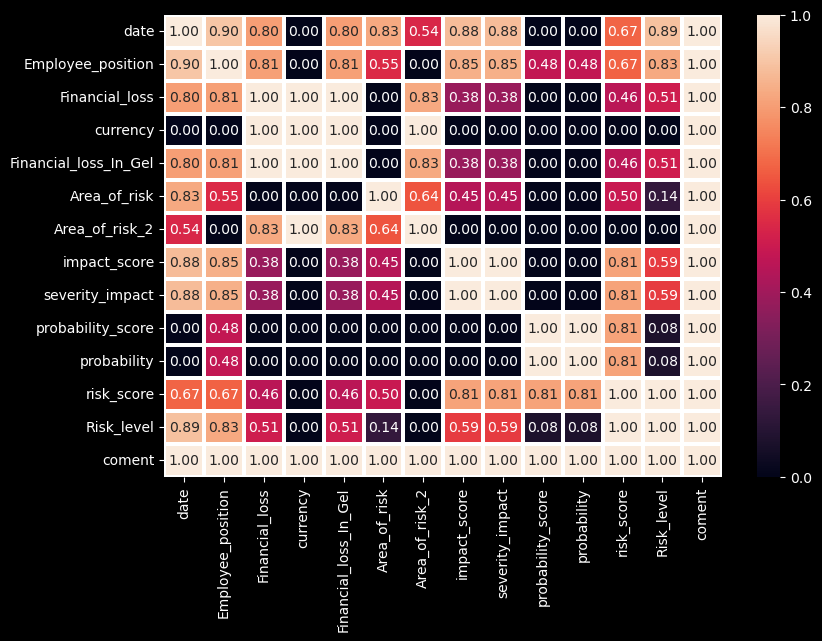

In [16]:
f,ax = plt.subplots(figsize=(9,6))

sns.heatmap(phik_overview, annot = True, linewidths=1.5 , fmt = '.2f',ax=ax)
plt.show()